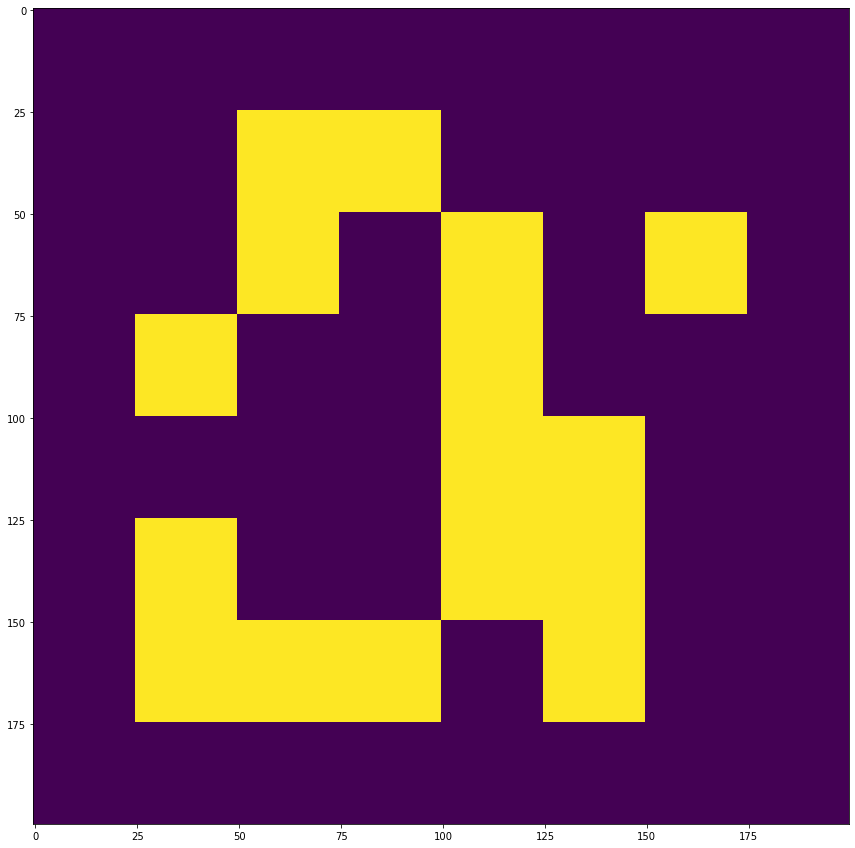

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Lade das ArUco-Dictionary
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)

# Erstelle einen Marker
marker_id = 42  # ID des Markers
marker_size = 200  # Größe des Markers in Pixeln
marker_image = np.zeros((marker_size, marker_size), dtype=np.uint8)
marker_image = cv2.aruco.generateImageMarker(aruco_dict, marker_id, marker_size, marker_image, 1)

# Speichere den Marker als Bilddatei
#cv2.imwrite('aruco_marker_42.png', marker_image)

# Zeige den Marker
plt.figure(figsize = (15,15))
plt.imshow(marker_image)

hier
None


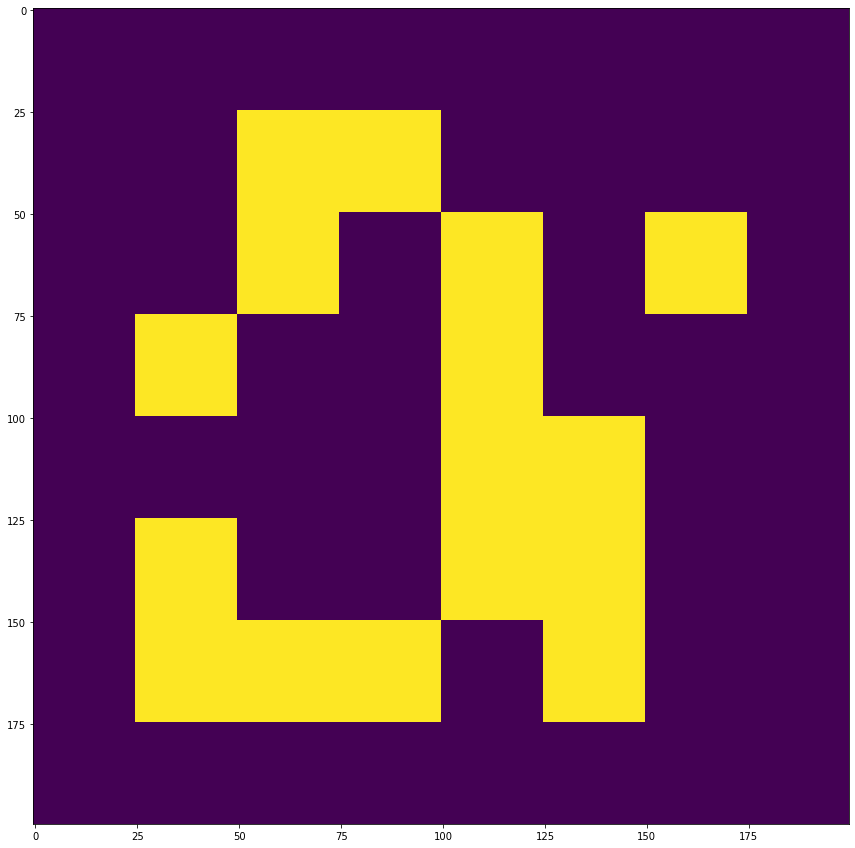

In [22]:
import cv2
import numpy as np

# Lade das ArUco-Dictionary
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)
#parameters = cv2.aruco.DetectorParameters_create()
parameters = cv2.aruco.DetectorParameters()


# Erstelle einen ArucoDetector
detector = cv2.aruco.ArucoDetector(aruco_dict, parameters)

# Öffne die Kamera
# Lade das Bild
image = cv2.imread('aruco_marker_42.png')

# Überprüfe, ob das Bild erfolgreich geladen wurde
if image is None:
    print("Bild konnte nicht geladen werden.")
else:

    # Konvertiere das Bild in Graustufen
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    print("hier")
    # Erkenne die Marker
    corners, ids, rejectedImgPoints = detector.detectMarkers(gray)

    print(ids)
    # Zeichne die erkannte Marker
    if ids is not None:
        print("ids dings")
        cv2.aruco.drawDetectedMarkers(image, corners, ids)

    # Zeige das Bild
    plt.figure(figsize = (15,15))
    plt.imshow(marker_image)

[[42]]
(array([[[371., 227.],
        [550., 315.],
        [462., 494.],
        [283., 406.]]], dtype=float32),)


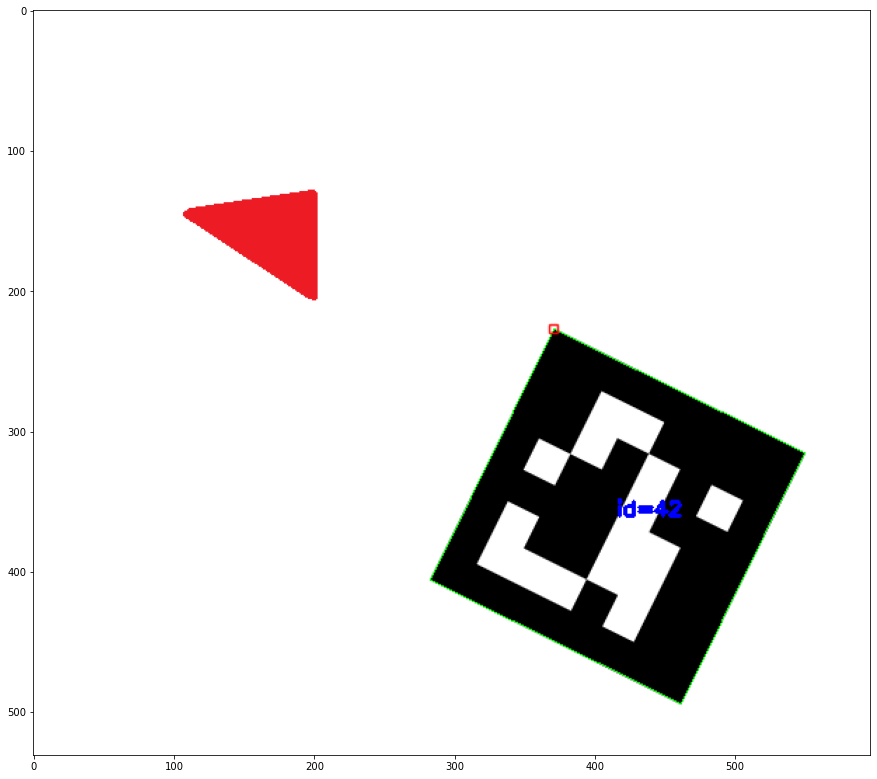

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Lade das ArUco-Dictionary
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)
parameters = cv2.aruco.DetectorParameters()

# Lade ein Testbild
image = cv2.imread('aruco_test_rotiert.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Erkenne die Marker
detector = cv2.aruco.ArucoDetector(aruco_dict, parameters)
corners, ids, rejectedImgPoints = detector.detectMarkers(gray)

print(ids)
print(corners)

# Zeichne die erkannte Marker
if ids is not None:
    cv2.aruco.drawDetectedMarkers(image, corners, ids)

# Zeige das Bild
plt.figure(figsize = (15,15))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

[[69]
 [42]
 [ 8]
 [ 9]
 [10]
 [11]
 [20]
 [42]
 [69]
 [12]
 [17]
 [13]
 [15]
 [16]
 [ 2]
 [14]
 [ 1]
 [19]
 [18]
 [ 7]
 [ 6]
 [ 5]
 [ 4]
 [ 3]]
1
[[ 86.  54.]
 [123.  54.]
 [123.  91.]
 [ 86.  91.]]
[123.  91.]
123.0
91.0


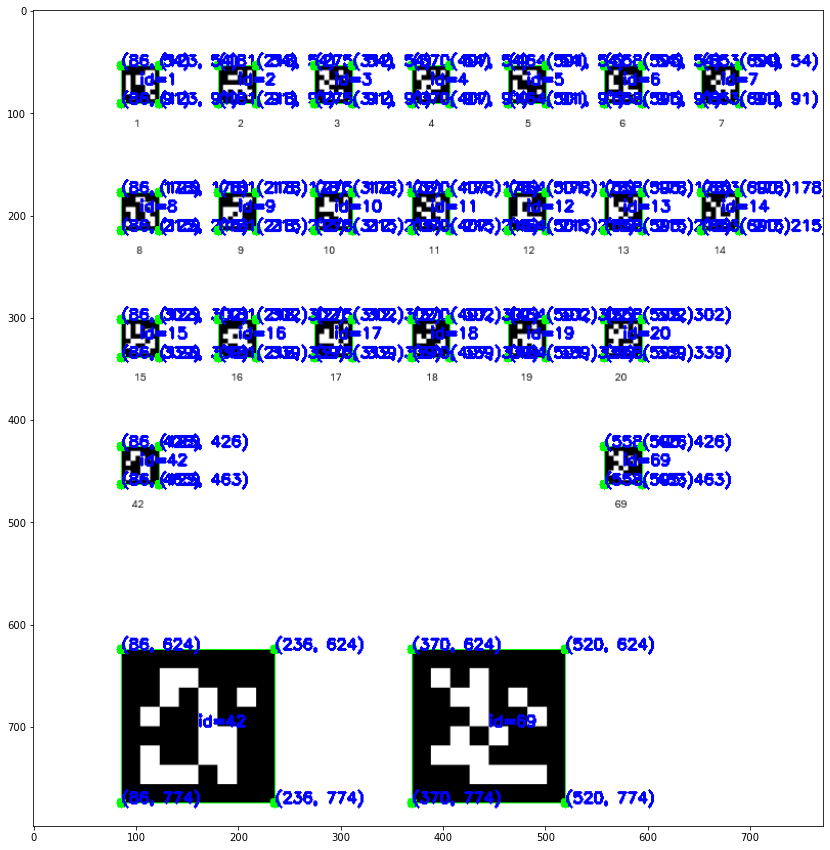

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Lade das ArUco-Dictionary
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)
parameters = cv2.aruco.DetectorParameters()

# Lade ein Testbild
#image = cv2.imread('aruco_test_rotiert.png')
image = cv2.imread('arocosbild.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Erkenne die Marker
detector = cv2.aruco.ArucoDetector(aruco_dict, parameters)
corners, ids, rejectedImgPoints = detector.detectMarkers(gray)

print(ids)
print(ids[16][0])
print(corners[16][0])
print(corners[16][0][2])
print(corners[16][0][2][0])
print(corners[16][0][2][1])

# Zeichne die erkannte Marker
if ids is not None:
    cv2.aruco.drawDetectedMarkers(image, corners, ids)

    for i in range(len(ids)):
        c = corners[i][0]
        for j in range(4):
            cv2.circle(image, (int(c[j][0]), int(c[j][1])), 5, (0, 255, 0), -1)
            cv2.putText(image, f"({int(c[j][0])}, {int(c[j][1])})", (int(c[j][0]), int(c[j][1])), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Zeige das Bild
plt.figure(figsize = (15,15))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

Kürzeste Kante: (array([256, 218], dtype=int32), array([256, 192], dtype=int32)) mit Länge 26.0


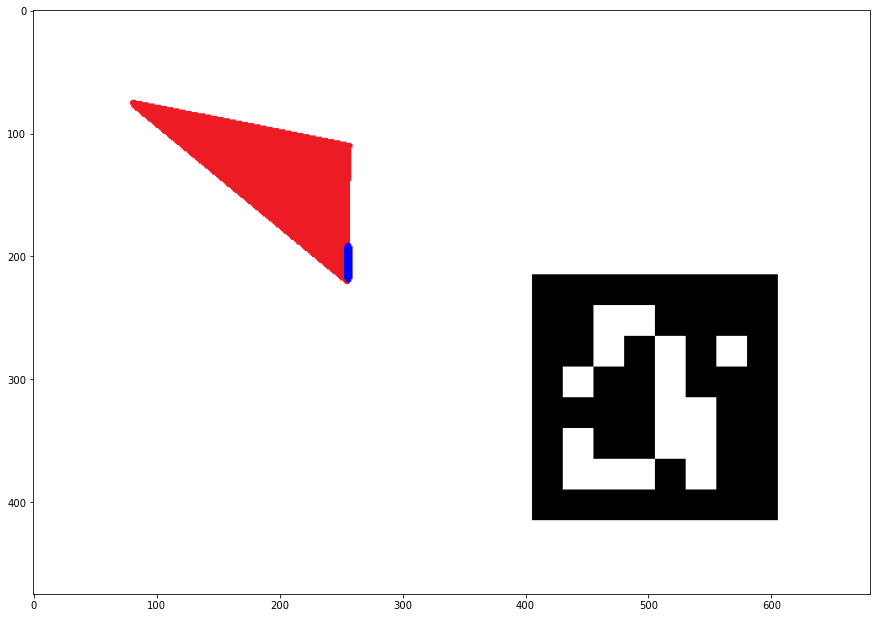

In [2]:
import cv2
import numpy as np
import ContourMethoden as cm
from matplotlib import pyplot as plt

# Lade das Bild
image = cv2.imread('aruco_test_gerade.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Wende einen Schwellenwert an, um ein Binärbild zu erhalten
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Finde die Konturen
#contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
outerContour, innerContour = cm.get_contours(image)

# Initialisiere Variablen für die kürzeste Kante
min_length = float('inf')
shortest_edge = None
min_edge_length = 20  # Mindestlänge für die Kante in Pixeln

# Iteriere durch die Konturen
for contour in outerContour:
    # Iteriere durch die Punkte der Kontur
    for i in range(len(contour)):
        # Bestimme die Endpunkte der Kante
        pt1 = contour[i][0]
        pt2 = contour[(i + 1) % len(contour)][0]
        
        # Berechne die Länge der Kante
        edge_length = np.linalg.norm(pt1 - pt2)
        
        # Aktualisiere die kürzeste Kante, falls diese kürzer ist
        if min_edge_length <= edge_length < min_length:
            min_length = edge_length
            shortest_edge = (pt1, pt2)

# Zeichne die kürzeste Kante auf dem Bild
if shortest_edge is not None:
    cv2.line(image, tuple(shortest_edge[0]), tuple(shortest_edge[1]), (255, 0, 0), 5)

# Zeige das Bild
plt.figure(figsize = (15,15))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

print(f"Kürzeste Kante: {shortest_edge} mit Länge {min_length}")

# Das Ding funktioniert:

Eckpunkte: [array([ 492, 1569], dtype=int32), array([ 494, 2555], dtype=int32), array([1725, 2538], dtype=int32), array([1718, 1585], dtype=int32), array([1460, 1322], dtype=int32), array([ 764, 1311], dtype=int32), array([ 492, 1569], dtype=int32), array([ 494, 2555], dtype=int32), array([1725, 2538], dtype=int32), array([1718, 1585], dtype=int32), array([1460, 1322], dtype=int32), array([ 764, 1311], dtype=int32)]
Kürzeste Kante von [1718 1585] nach [1460 1322]: Länge = 368.42


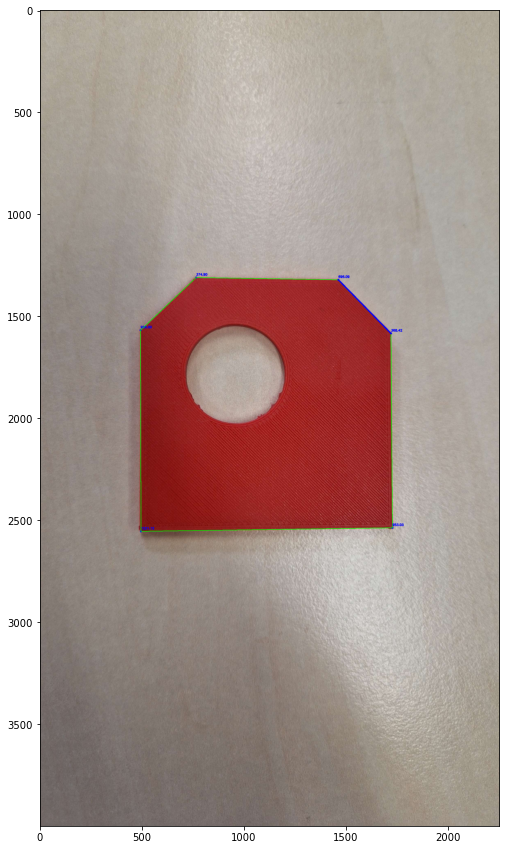

In [2]:
import cv2
import numpy as np
import ContourMethoden as cm
from matplotlib import pyplot as plt

# Lade das Bild
#image = cv2.imread('aruco_test_gerade.png')
image = cv2.imread('Teil.jpg')

# Finde die Konturen
outerContour, innerContour = cm.get_contours(image)

# Initialisiere eine Liste für die Eckpunkte
corner_points = []

# Iteriere durch die Konturen
for contour in outerContour:
    # Verwende die Approximation, um die Eckpunkte zu finden
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    
    # Füge die Eckpunkte zur Liste hinzu
    for point in approx:
        corner_points.append(point[0])
        # Zeichne die Eckpunkte auf dem Bild
        cv2.circle(image, tuple(point[0]), 5, (255, 0, 0), -1)

# Berechne die Kantenlängen zwischen den Eckpunkten
edges = []
for i in range(len(corner_points)):
    pt1 = corner_points[i]
    pt2 = corner_points[(i + 1) % len(corner_points)]  # Verbinde den letzten Punkt mit dem ersten
    edge_length = np.linalg.norm(pt1 - pt2)
    edges.append((pt1, pt2, edge_length))
    # Zeichne die Kanten auf dem Bild
    cv2.line(image, tuple(pt1), tuple(pt2), (0, 255, 0), 2)
    cv2.putText(image, f"{edge_length:.2f}", (pt1[0], pt1[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Bestimme die kürzeste Kante
shortest_edge = min(edges, key=lambda x: x[2])

# Zeichne die kürzeste Kante auf dem Bild deutlicher ein (dicker und in einer auffälligen Farbe)
cv2.line(image, tuple(shortest_edge[0]), tuple(shortest_edge[1]), (255, 0, 0), 5)  # Blaue Farbe und dickere Linie

# Zeige das Bild mit den Eckpunkten
plt.figure(figsize = (15,15))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

# Drucke die Eckpunkte
print("Eckpunkte:", corner_points)
# Drucke die kürzeste Kante und ihre Länge
print(f"Kürzeste Kante von {shortest_edge[0]} nach {shortest_edge[1]}: Länge = {shortest_edge[2]:.2f}")

[[42]]


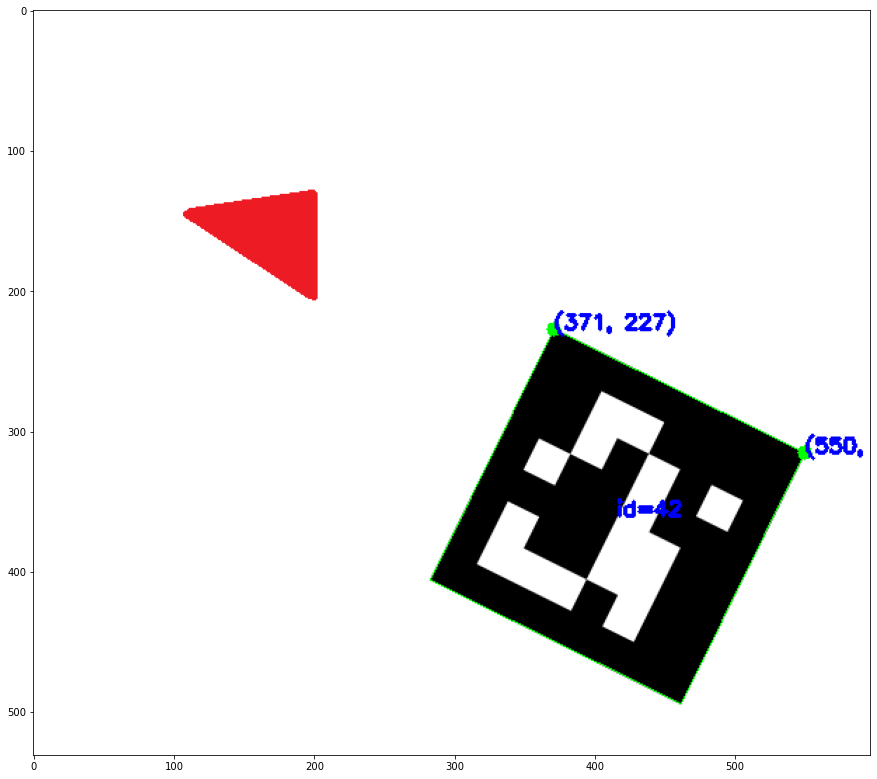

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Lade das ArUco-Dictionary
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)
parameters = cv2.aruco.DetectorParameters()

# Lade ein Testbild
image = cv2.imread('aruco_test_rotiert.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Erkenne die Marker
detector = cv2.aruco.ArucoDetector(aruco_dict, parameters)
corners, ids, rejectedImgPoints = detector.detectMarkers(gray)

print(ids)

# Zeichne die erkannte Marker
if ids is not None:
    cv2.aruco.drawDetectedMarkers(image, corners, ids)

    for i in range(len(ids)):
        c = corners[i][0]
        for j in range(2):
            cv2.circle(image, (int(c[j][0]), int(c[j][1])), 5, (0, 255, 0), -1)
            cv2.putText(image, f"({int(c[j][0])}, {int(c[j][1])})", (int(c[j][0]), int(c[j][1])), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Zeige das Bild
plt.figure(figsize = (15,15))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

42
(array([[[406., 215.],
        [605., 215.],
        [605., 414.],
        [406., 414.]]], dtype=float32),)
x1:  406.0,
y1:  215.0,
x2:  605.0,
y2:  215.0,
Der Winkel zur x-Achse beträgt: 0.0 Grad
Relative Position: x = 68.67%, y = 28.75%


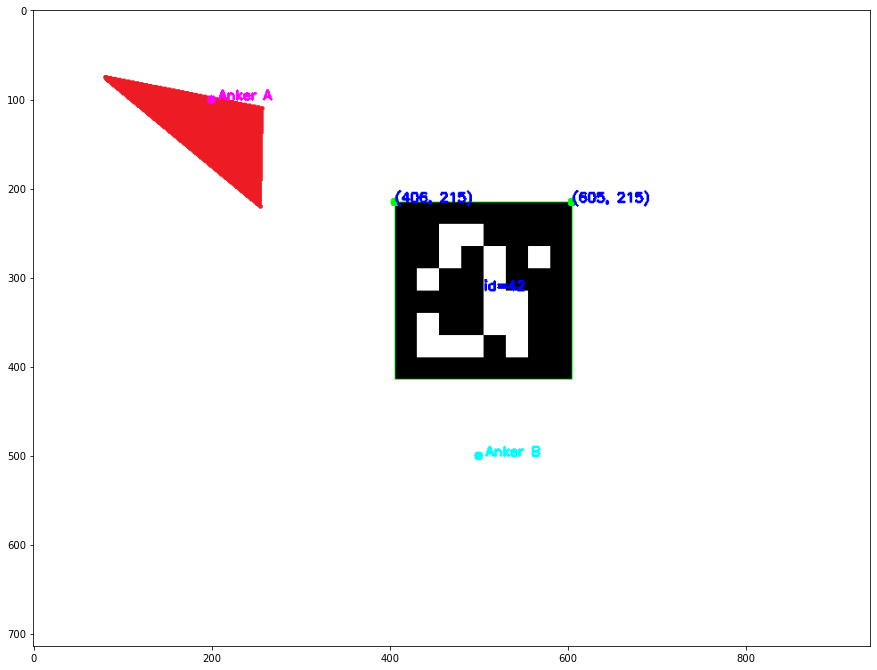

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Lade das ArUco-Dictionary
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)
parameters = cv2.aruco.DetectorParameters()

# Lade ein Testbild
image = cv2.imread('aruco_test_gerade.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Erkenne die Marker
detector = cv2.aruco.ArucoDetector(aruco_dict, parameters)
corners, ids, rejectedImgPoints = detector.detectMarkers(gray)

print(ids[0][0])
print(corners)

# Zeichne die erkannte Marker
if ids is not None:
    cv2.aruco.drawDetectedMarkers(image, corners, ids)

    for i in range(len(ids)):
        c = corners[i][0]
        for j in range(2):
            cv2.circle(image, (int(c[j][0]), int(c[j][1])), 5, (0, 255, 0), -1)
            cv2.putText(image, f"({int(c[j][0])}, {int(c[j][1])})", (int(c[j][0]), int(c[j][1])), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)


#----------------
# Koordinaten der Punkte
x1, y1 = c[0][0], c[0][1]
x2, y2 = c[1][0], c[1][1]

print(f"x1: {x1: },")
print(f"y1: {y1: },")
print(f"x2: {x2: },")
print(f"y2: {y2: },")

# Berechnung des Anstiegs
m = (y2 - y1) / (x2 - x1)

# Berechnung des Winkels in Radiant
theta = np.arctan(m)

# Umwandlung des Winkels in Grad
theta_degrees = np.degrees(theta)

print(f"Der Winkel zur x-Achse beträgt: {theta_degrees} Grad")

#-----
# Koordinaten der Ankerpunkte
x_min, y_min = 200, 100
x_max, y_max = 500, 500

# Koordinaten des Punktes
#x1, y1 = 371.0, 227.0

# Berechnung der relativen Position in Prozent
x_rel = (x1 - x_min) / (x_max - x_min) * 100
y_rel = (y1 - y_min) / (y_max - y_min) * 100

print(f"Relative Position: x = {x_rel:.2f}%, y = {y_rel:.2f}%")

cv2.circle(image, (x_min, y_min), 5, (255, 0, 255), -1)
cv2.putText(image, f" Anker A", (x_min, y_min), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 255), 2)
cv2.circle(image, (x_max, y_max), 5, (255, 255, 0), -1)
cv2.putText(image, f" Anker B", (x_max, y_max), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)


# Zeige das Bild
plt.figure(figsize = (15,15))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)


10
x1:  919.0,
y1:  633.0,
x2:  1005.0,
y2:  633.0,
Der Winkel zur x-Achse beträgt: 0.0 Grad
Relative Position: x = 65.36%, y = 66.62%


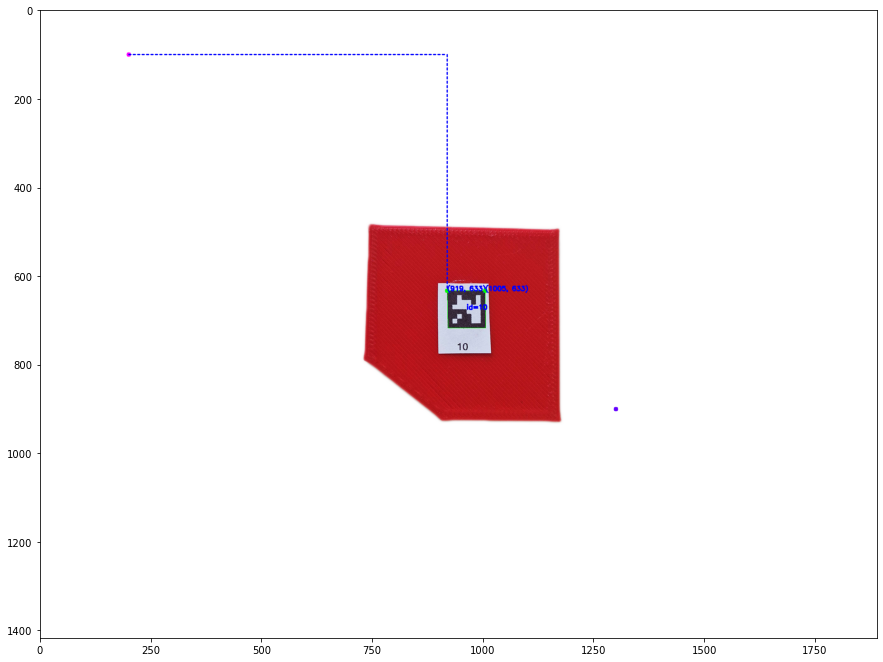

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def draw_dashed_line(img, pt1, pt2, color, thickness=1, dash_length=10):
    # Berechne die Länge der Linie
    line_length = int(np.hypot(pt2[0] - pt1[0], pt2[1] - pt1[1]))
    
    # Berechne die Anzahl der Segmente
    dashes = line_length // dash_length
    
    for i in range(dashes):
        start = (int(pt1[0] + (pt2[0] - pt1[0]) * i / dashes), int(pt1[1] + (pt2[1] - pt1[1]) * i / dashes))
        end = (int(pt1[0] + (pt2[0] - pt1[0]) * (i + 0.5) / dashes), int(pt1[1] + (pt2[1] - pt1[1]) * (i + 0.5) / dashes))
        cv2.line(img, start, end, color, thickness)

# Lade das ArUco-Dictionary
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)
parameters = cv2.aruco.DetectorParameters()

# Lade ein Testbild
#image = cv2.imread('aruco_test_rotiert.png')
image = cv2.imread('Plakatbild.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Erkenne die Marker
detector = cv2.aruco.ArucoDetector(aruco_dict, parameters)
corners, ids, rejectedImgPoints = detector.detectMarkers(gray)

print(ids[0][0])

# Zeichne die erkannte Marker
if ids is not None:
    cv2.aruco.drawDetectedMarkers(image, corners, ids)

    for i in range(len(ids)):
        c = corners[i][0]
        for j in range(2):
            cv2.circle(image, (int(c[j][0]), int(c[j][1])), 5, (0, 255, 0), -1)
            cv2.putText(image, f"({int(c[j][0])}, {int(c[j][1])})", (int(c[j][0]), int(c[j][1])), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)


#----------------
# Koordinaten der Punkte
x1, y1 = c[0][0], c[0][1]
x2, y2 = c[1][0], c[1][1]

print(f"x1: {x1: },")
print(f"y1: {y1: },")
print(f"x2: {x2: },")
print(f"y2: {y2: },")

# Berechnung des Anstiegs
m = (y2 - y1) / (x2 - x1)

# Berechnung des Winkels in Radiant
theta = np.arctan(m)

# Umwandlung des Winkels in Grad
theta_degrees = np.degrees(theta)

print(f"Der Winkel zur x-Achse beträgt: {theta_degrees} Grad")

#-----
# Koordinaten der Ankerpunkte
x_min, y_min = 200, 100
x_max, y_max = 1300, 900


# Berechnung der relativen Position in Prozent
x_rel = (x1 - x_min) / (x_max - x_min) * 100
y_rel = (y1 - y_min) / (y_max - y_min) * 100

print(f"Relative Position: x = {x_rel:.2f}%, y = {y_rel:.2f}%")

cv2.circle(image, (x_min, y_min), 5, (255, 0, 255), -1)
#cv2.putText(image, f" Anker A", (x_min, y_min), cv2.FONT_HERSHEY_SIMPLEX, 2.5, (255, 0, 255), 2)
cv2.circle(image, (x_max, y_max), 5, (255, 0, 100), -1)
#cv2.putText(image, f" Anker B", (x_max, y_max), cv2.FONT_HERSHEY_SIMPLEX, 2.5, (255, 0, 100), 2)

# Zeichnen der gestrichelten Linien
draw_dashed_line(image, (x_min, y_min), (int(x1), y_min), (255, 0, 0), 2)
draw_dashed_line(image, (int(x1), y_min), (int(x1), int(y1)), (255, 0, 0), 2)

# Zeige das Bild
plt.figure(figsize = (15,15))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
